In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import math

In [2]:
cd ../data

/data/Wei/Italy/data


In [5]:
ls

old_test/                   serendip6_panoseti_sxp_1_1_20230217_154019.working
s6_ETFITS_mro_template.txt  test.out


40.754265 464.46725


Text(0, 0.5, 'meanpow')

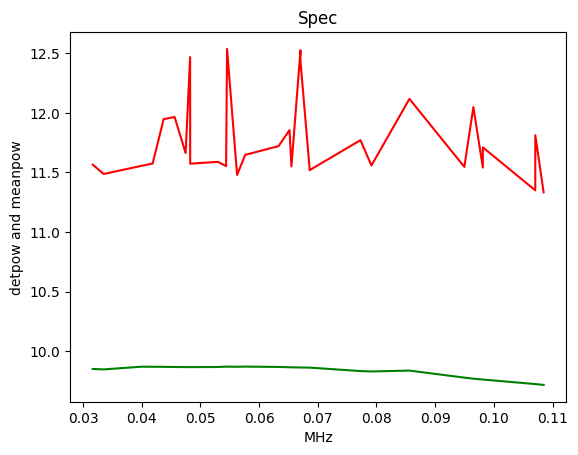

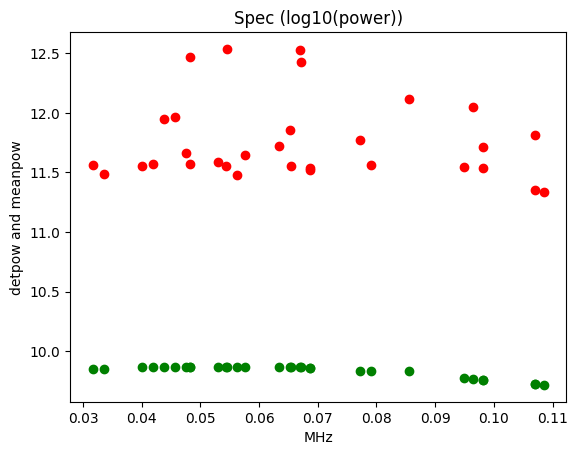

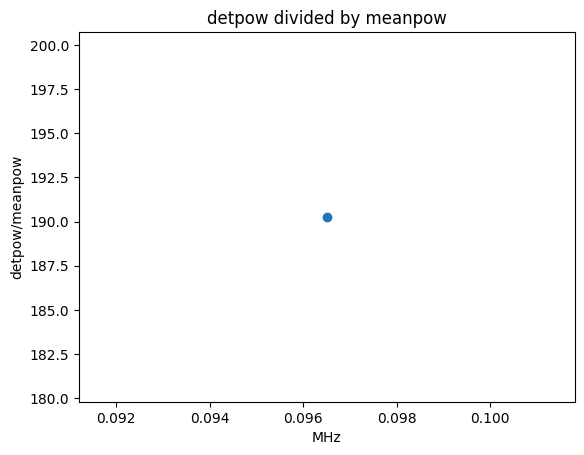

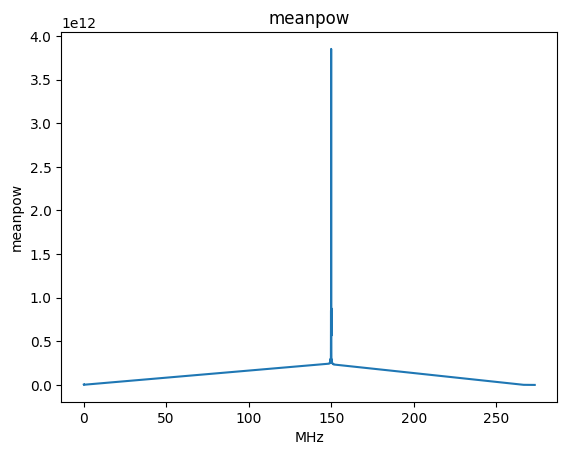

In [16]:
#filename = '150M/serendip6_panoseti__2_0_20220815_234618.fits'
#ch = 48
#det_ch=[30,38]

'''
filename = '150M_57.5dbm/serendip6_panoseti__2_0_20220816_181951.fits'
ch = 36
det_ch=[31,32]
'''
'''
filename = '150M_65.3dbm/serendip6_panoseti__2_0_20220816_191725.fits'
hdu=fits.open(filename)
ch = 48
det_ch=[31,32]
'''
'''
filename = '150M_68.3dbm/serendip6_panoseti__2_0_20220816_190116.fits'
hdu=fits.open(filename)
ch = 62
det_ch=[31,32]
'''
#filename = '150M_62.3dbm/serendip6_panoseti__2_0_20220816_192925.fits'
filename = 'serendip6_panoseti_sxp_1_1_20230217_154019.working'
hdu=fits.open(filename)
ch = 31
det_ch=[25,26]

n = 12
detpow = hdu[n].data.field('DETPOW')
meanpow = hdu[n].data.field('MEANPOW')
coarchan =hdu[n].data.field('COARCHAN')
finechan = hdu[n].data.field('FINECHAN')


for i in range(len(detpow)):
    meanpow[i] =  math.log(meanpow[i]+0.00001,10)
    detpow[i] =  math.log(detpow[i],10)
'''
plt.figure('f0')
plt.plot(meanpow)
plt.title('MEANPOW')
plt.figure('f1')
plt.plot(detpow)
plt.title('DETPOW')
plt.figure('f2')
plt.plot(finechan)
plt.title('FINECHAN')
'''
plt.figure('f3')
x = finechan/(256*1024*1024)*900
plt.plot(x[0:ch], detpow[0:ch], color='r')
plt.plot(x[0:ch], meanpow[0:ch], color='g')
#plt.scatter(x, detpow, color='r')
#plt.scatter(x, meanpow, color='g')
plt.title('Spec')
plt.xlabel('MHz')
plt.ylabel('detpow and meanpow')

plt.figure('f3-1')
plt.scatter(x[0:ch], detpow[0:ch], color='r')
plt.scatter(x[0:ch], meanpow[0:ch], color='g')
plt.title('Spec (log10(power))')
plt.xlabel('MHz')
plt.ylabel('detpow and meanpow')
hdu.close()

plt.figure('f4')
hdu=fits.open(filename)
detpow = hdu[n].data.field('DETPOW')
meanpow = hdu[n].data.field('MEANPOW')
d = detpow[0:ch]/meanpow[0:ch]
print(min(d),max(d))
plt.scatter(x[det_ch[0]:det_ch[1]],d[det_ch[0]:det_ch[1]])
plt.title('detpow divided by meanpow')
plt.xlabel('MHz')
plt.ylabel('detpow/meanpow')

plt.figure('f5')
plt.plot(x[ch:],meanpow[ch:])
plt.title('meanpow')
plt.xlabel('MHz')
plt.ylabel('meanpow')

In [13]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BLOCKED =                    T / Blocks of 2880 bytes                           
ORIGIN  = 'SERENDIP VI'        / File was created by the guppi_daq sw           
DATE    = '2023-02-17T23:40:19' / Date (dd/mm//yy) this file was written        
HDRVER  =                   1. / Header version                                 
S6HPCVER= '0.8.0   '           / version of serendip6.so                        
LBGPUVER= '0.8.0   '           / version of libS6GPU.so                         
HASHPVER= '0.1.0   '        

In [15]:
hdu[1].header

XTENSION= 'BINTABLE'           / FITS binary table                              
BITPIX  =                    8 / Binary data                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    0 / width of table in bytes                        
NAXIS2  =                    0 / Number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    0 / Number of fields per row                       
EXTNAME = 'MROSTATUS'          / name of this binary table extension            
NMATRIX =                    1 / 1 dataset per row                              
COARCHID=                    0 / coarse channel ID                              
TIME    = '*       '           / unix time, decimal seconds                     
RECEIVER= '*       '        